# Pymaceuticals Inc.
---

### Analysis

- The correlation between mouse weight and average tumor volume is 0.88 which shows that when the mouse weighs more the tumor volume rises.
- Capomulin & Ramicane were most successful in shrinking the tumor volume over time.
- There was a 2% difference in Female mice vs male mice tested
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_results = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
data_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
# Checking the number of mice.
data_results['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_results.loc[data_results.duplicated(['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = data_results.loc[data_results['Mouse ID'] == 'g989']
dup_mouse.set_index('Mouse ID')

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_results[data_results['Mouse ID'].isin(dup_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique() 

248

## Summary Statistics

* Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg = clean_df.groupby('Drug Regimen')
tumor_mean = drug_reg['Tumor Volume (mm3)'].mean()
tumor_median = drug_reg['Tumor Volume (mm3)'].median()
tumor_variance = drug_reg['Tumor Volume (mm3)'].var()
tumor_stddev = drug_reg['Tumor Volume (mm3)'].std()
tumor_sem = drug_reg['Tumor Volume (mm3)'].sem()

drug_reg_df = pd.DataFrame ({ 'Mean Tumor Volume' : tumor_mean , 'Median Tumor Volume' : tumor_median , 
                             'Tumor Volume Variance' : tumor_variance, 'Tumor Volume Std. Dev.' : tumor_stddev,
                         'Tumor Volume Std. Err.' : tumor_sem})
drug_reg_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts
* Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas & Pyplot
* Generate a pie plot showing the distribution of female versus male mice using Pandas & Pyplot

<Axes: xlabel='Drug Regimen'>

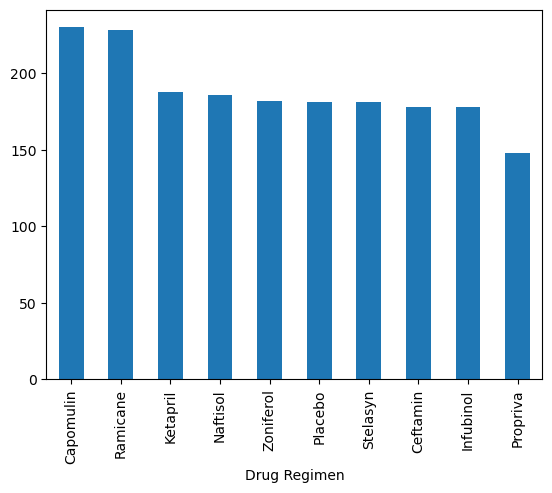

In [12]:
# Group Drug Regimen & Timepoint
timepoint_bar = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
# plot the group in decsending order 
timepoint_bar.sort_values(ascending=False).plot.bar()

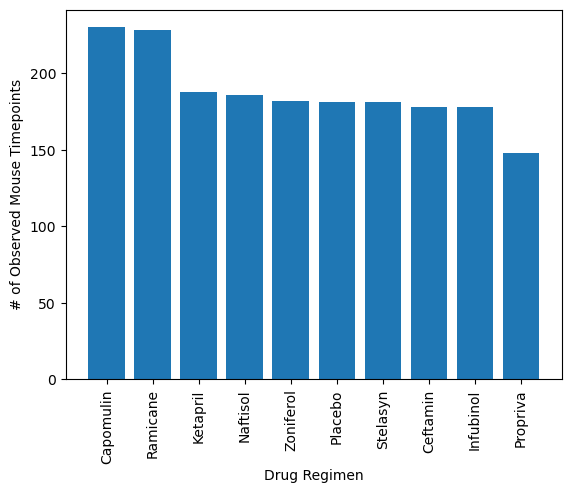

In [13]:

#use pyplot to get bar chart 
timepoint = timepoint_bar.sort_values(ascending=False)
plt.bar(timepoint.index, timepoint.values)

# Label x & y axis 
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
# Rotate tick labels
plt.xticks(rotation=90)

plt.show()

<Axes: ylabel='Sex'>

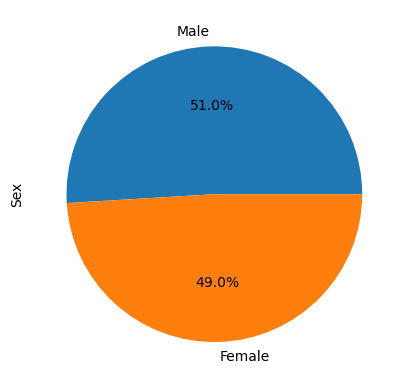

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_df['Sex'].value_counts()
male_female.plot(kind='pie', autopct="%1.1f%%", ylabel='Sex')

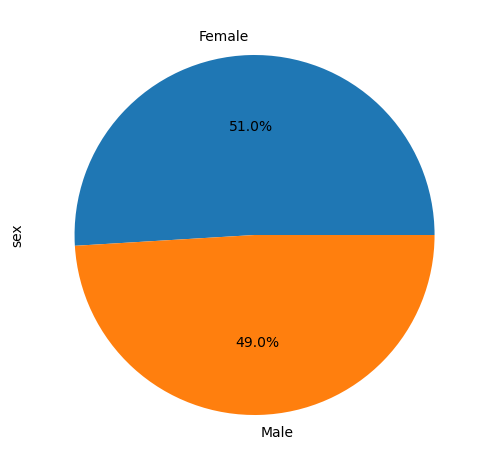

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#create x and y values
labels=('Female','Male')
sizes = male_female

plt.pie(sizes.values, labels=labels, autopct='%1.1f%%', radius=1)
# add y label
plt.ylabel("sex")

plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots
* Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    - Capomulin, Ramicane, Infubinol, and Ceftamin

In [42]:
# Start by getting the last (greatest) timepoint for each mouse
#greatest timepoint per (mouse)
final_time = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
final_timedf =pd.DataFrame(final_time)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(clean_df, final_timedf, on=('Mouse ID','Timepoint'),how='right')
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_infu = []
tumor_ceft = [] 

In [45]:
 # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_df.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_infu.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_ceft.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({ treatments[0] : tumor_cap, treatments[1] : tumor_ram, treatments[2] : tumor_infu, treatments[3] : tumor_ceft})
       


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [101]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


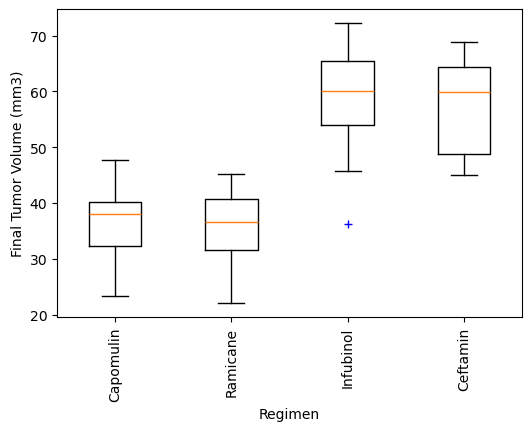

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]

fig = plt.figure(figsize=(6,4))  

# label x & y 
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# change symbol & color of outlier
plt.boxplot(boxplot_list, sym='b+')
#label ticks
plt.xticks([1,2,3,4], treatments, rotation=90)


#show boxplot
plt.show()

## Line and Scatter Plots

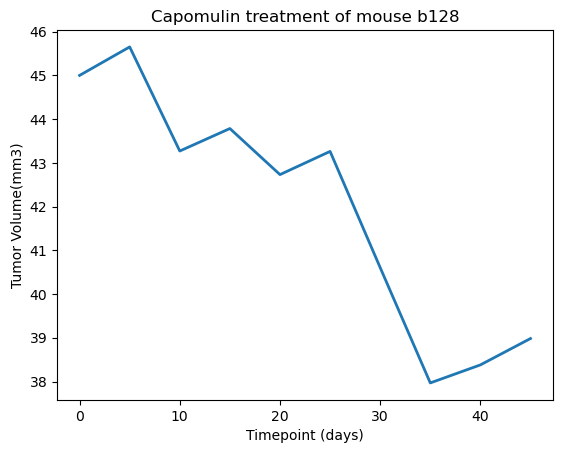

In [84]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = data_results.loc[data_results["Mouse ID"] =="b128"]
line_df.head()

# add x & y axis
x_axis = line_df["Timepoint"]
y_axis = line_df['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, linewidth=2, markersize=12,)

# label x,y & title
plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treatment of mouse b128')

# show lineplot
plt.show()

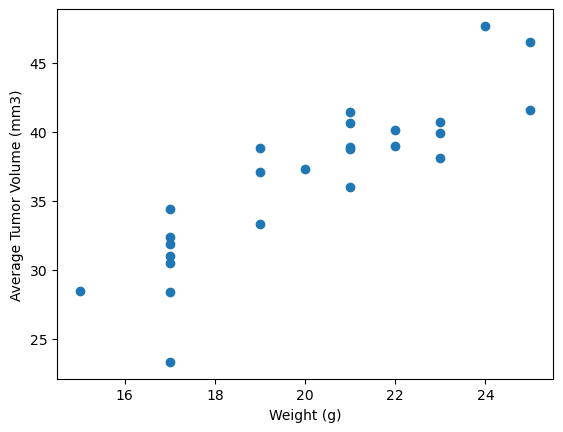

In [110]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#create DataFrame of Capomulin 
capo_df = final_df.loc[final_df['Drug Regimen']=='Capomulin', :]

# create scatter plot 
plt.scatter(capo_df['Weight (g)'],capo_df['Tumor Volume (mm3)'])

#add x,y label
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [123]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capo_df['Weight (g)'],capo_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

# calculate linear regression using st.linregress() function
model=st.linregress(capo_df['Weight (g)'],capo_df['Tumor Volume (mm3)'])
model


The correlation between mouse weight and average tumor volume is 0.88


LinregressResult(slope=1.750468228958504, intercept=1.4481469525549002, rvalue=0.8767060403658119, pvalue=9.0844290886732e-09, stderr=0.20026513236453639, intercept_stderr=4.068291402922092)

In [125]:
# define slope
# define the y-intercept
slope = 1.750468228958504
intercept = 1.4481469525549002

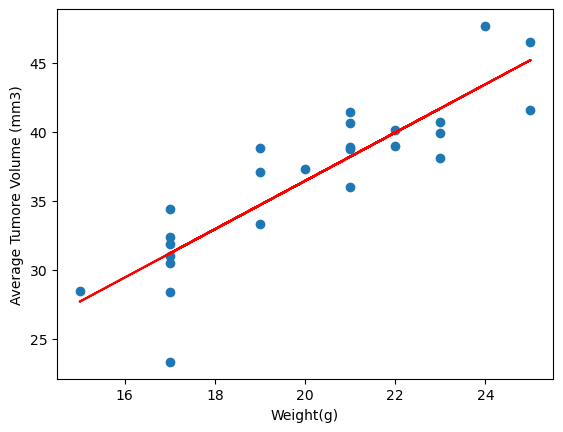

In [127]:
# ploting the regression line

# calculate the the linear line plot list of values
line = slope*(capo_df['Weight (g)'])+intercept
# create the scatter plot
plt.scatter(capo_df['Weight (g)'],capo_df['Tumor Volume (mm3)'])

# plot the linear regression line
plt.plot(capo_df['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()